## Part A: Conceptual Questions

#### What is a Decision Tree and how does it make decisions?


A Decision Tree is a supervised ML model that makes decisions by splitting data into branches based on feature values, forming a tree-like structure, and predicting at the leaf nodes.

#### What does a split criterion mean in a Decision Tree?


It is the rule used to choose the best feature and threshold to split data at each node, aiming to create purer (more homogeneous) child nodes.

#### Difference between Gini Impurity and Entropy.


Gini: Measures how often a random sample would be misclassified; faster to compute.

Entropy: Measures uncertainty or disorder; based on information theory.
Both aim to maximize purity; results are usually similar.

#### Why do Decision Trees tend to overfit?

They can grow very deep and learn noise in the training data, especially with many splits and no constraints.

#### What role does the max_depth parameter play?


It limits how deep the tree can grow, helping control overfitting and improving generalization.

## Part B: Data Exploration

In [61]:
import pandas as pd

In [62]:
data=pd.read_csv(r"C:\Users\Sireesha Peruri\Downloads\archive\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [63]:
data.shape

(1025, 14)

In [64]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [65]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [66]:
X=data.drop('target',axis=1)


In [67]:
y=data['target']

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Part C: Data Preprocessing

In [69]:
X=data.drop('target',axis=1)
y=data['target']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

## Part D: Model Building

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:

dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [74]:
dt.score(X_train,y_train)

1.0

In [75]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, y_pred)




0.9853658536585366

In [77]:
cm  = confusion_matrix(y_test, y_pred)
cm


array([[100,   0],
       [  3, 102]], dtype=int64)

In [78]:
cr  = classification_report(y_test, y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99       100\n           1       1.00      0.97      0.99       105\n\n    accuracy                           0.99       205\n   macro avg       0.99      0.99      0.99       205\nweighted avg       0.99      0.99      0.99       205\n'

#### Which class is predicted better?  , Is the model overfitting or underfitting?


class 0 is predicted better,It is good fit

##  Part F: Understanding Tree Depth (Manual Experiment)

### Max_depth=2

In [79]:
dt = DecisionTreeClassifier(max_depth = 2)
dt

DecisionTreeClassifier(max_depth=2)

In [80]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [81]:
dt.score(X_train, y_train)

0.7695121951219512

In [82]:
y_pred1 = dt.predict(X_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [83]:
accuracy_score(y_pred1, y_test)

0.7219512195121951

### Max_depth=5

In [84]:
dt2= DecisionTreeClassifier(max_depth = 5)
dt2

DecisionTreeClassifier(max_depth=5)

In [85]:
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [86]:
dt2.score(X_train,y_train)

0.9292682926829269

In [94]:
y_pred2 = dt2.predict(X_test)
y_pred2

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [95]:
accuracy_score(y_pred2, y_test)

0.8731707317073171

### Max_depth=None

In [89]:
dt3= DecisionTreeClassifier()
dt3

DecisionTreeClassifier()

In [90]:
dt3.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
dt3.score(X_train,y_train)

1.0

In [96]:
y_pred3 = dt3.predict(X_test)
y_pred3

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [97]:
accuracy_score(y_pred3,y_test)

0.9853658536585366

#### What happens when the tree is very shallow?

Low training accuracy (0.77),
Model is too simple,
Underfitting,
Cannot capture complex patterns

#### What happens when the tree is very deep?

Training accuracy is high chance to memorize rather than generalize.

#### Which model performs best and why?

Best model: max_depth = None,because It has the highest test accuracy (98.5%)

Training accuracy = 100% and test accuracy is also very high

Indicates the model is learning real patterns, not just memorizing

## Part G: Tree Visualization

In [98]:
from sklearn.tree import  plot_tree

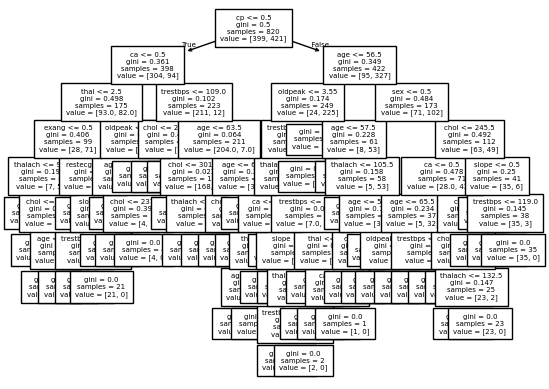

In [106]:
import matplotlib.pyplot as plt
plot_tree(dt3, feature_names = data.columns,fontsize=5)
plt.show()

## Part H: Reflection Questions

#### Why are Decision Trees suitable for medical datasets?
They are highly interpretable (doctors can understand decisions)

Handle non-linear relationships well

Work with mixed data types (categorical + numerical)



#### What makes Decision Trees easy to interpret?


Decisions are based on if–else rules

You can trace the exact path from root to leaf

Feature importance is clear and visualizable

#### Why are Decision Trees commonly used in ensemble methods?

Single trees are unstable (high variance)

Ensembles (Random Forest, Gradient Boosting) reduce overfitting

Combining many trees improves accuracy and robustness

### Compare criterion='gini' vs criterion='entropy'


In [108]:

dt5 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [109]:
dt5.score(X_train,y_train)

1.0

In [124]:
y_pred = dt5.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [125]:
accuracy_score(y_pred,y_test)


1.0

In [115]:
dt6= DecisionTreeClassifier(min_samples_leaf=10)
dt6

DecisionTreeClassifier(min_samples_leaf=10)

In [116]:
dt6.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [117]:
dt6.score(X_train,y_train)

0.9195121951219513

In [119]:
y_pred=dt6.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [120]:
accuracy_score(y_pred,y_test)

0.8780487804878049

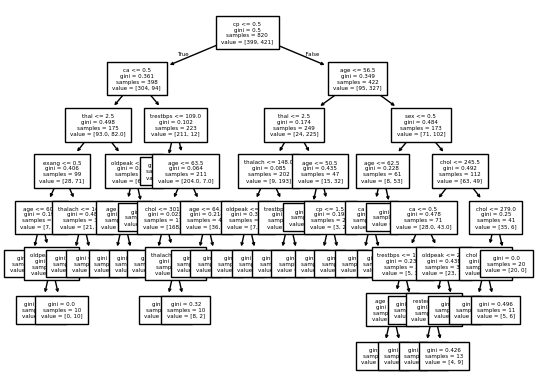

In [123]:
plot_tree(dt6,feature_names = data.columns,fontsize=4)
plt.show()

### conclusion

Specifies the **minimum number of samples required in a leaf node**
Prevents the tree from learning from very small sample groups, Helps control overfitting by limiting leaf size  

 Effects of changing it
- **Small value (e.g., 1)**  
  - Complex tree  
  - High variance  
  - Risk of overfitting  

- **Larger value (e.g., 5, 10)**  
  - Simpler tree  
  - Smoother decision boundaries  
  - Better generalization  
